Indice: 
  - Introduccion
  - Codigo
  - Conclusion

# INTRODUCCION

Utilizaremos dataset "disp_st31ns1.txt" para entrenar

1.   List item
2.   List item



# Exploracion de datos

(0.25 puntos) Hacer un Análisis Exploratorio de Datos (EDA).

Pablo:

# Metodos basicos

Creo que el codigo final va en otro notebook, pero lo hacemos aqui de mientras

In [ ]:
# Instalamos las lib que no esten en jupyter
# Para visualizar arboles
!pip install --upgrade linear-tree

!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se hacen los imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import warnings
import matplotlib.pyplot as plt
import time # ya que se pide que se mida el tiempo de ejecucion
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

Se lodean los datos y se divide en entrenamiento y en test

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
# Cambia el directorio donde tengas los tutoriales con el fichero "tennis.txt"
os.chdir("/content/gdrive/MyDrive")

Mounted at /content/gdrive


In [ ]:
# Cargar los datos
data = pd.read_csv('disp_st32ns1.txt')

# Eliminar la columna "Unnamed: 0" si es necesario
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

print(data.head())

# Separar la variable de salida del resto de variables de entrada
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Separa los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# Separa los datos de entrenamiento en conjuntos de entrenamiento y validación
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12)



   apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
0    0.000000         0.0         0.0    0.000000    0.000000  278.401764   
1    0.000000         0.0         0.0    0.016364    0.132727  249.362233   
2    0.016364         0.0         0.0    0.000000    0.000000  233.007274   
3    0.000000         0.0         0.0    0.000000    0.000000  240.408503   
4    0.000000         0.0         0.0    0.000000    0.000000  232.071838   

   dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
0  246.423459  251.719940  268.195853  266.377441  ...  251.322657   
1  255.096853  273.618458  320.441742  310.292719  ...  232.640081   
2  215.177840  217.951275  237.074578  238.476496  ...  235.374191   
3  237.441999  247.948128  255.274556  245.349503  ...  239.098594   
4  237.108869  245.123549  267.031791  267.845553  ...  232.888478   

   ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  \
0  254.851178  263.160586  259.249662  

## Valores por defecto

Evaluar en KNN

In [ ]:
# Crear modelo de KNN sin especificar hiperparámetros
knn = KNeighborsRegressor()

# Medir tiempo de entrenamiento con los datos de entrenamiento
start_time = time.time()
knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time

# Evaluar modelo utilizando validación cruzada
rmse_knn = np.sqrt(-cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_knn = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()

# Mostrar resultados
print("KNN (por omisión):\n", "RMSE:", rmse_knn, "\n", "MAE:", mae_knn, "\n", "r2:", r2_knn, "\n", "Tiempo de entrenamiento knn:", train_time_knn)


KNN (por omisión):
 RMSE: 4102958.9895420386 
 MAE: 3010597.278359242 
 r2: 0.73826108975653 
 Tiempo de entrenamiento knn: 0.005337238311767578


Con arboles de regresion

In [ ]:
# arbol de regresion con validacion cruzada
decision_tree = DecisionTreeRegressor()

# Evaluar modelo con 3 mediciones
# se mide el tiempo
start_time = time.time()
decision_tree.fit(X_train, y_train)
train_time_tree = time.time() - start_time

rmse_tree = np.sqrt(-cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_tree= -cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_tree = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='r2').mean()

print("Árbol de regresión:\n", "RMSE:", rmse_tree, "\n", "MAE:", mae_tree, "\n", "r2:", r2_tree, "\n", "Tiempo de entrenamiento tree:", train_time_tree)


Árbol de regresión:
 RMSE: 4779680.626062239 
 MAE: 3269617.4788000816 
 r2: 0.6485627201604555 
 Tiempo tree: 0.4185812473297119


Con regresion lineal

In [ ]:
# Crear modelo de regresión lineal
linear_regression = LinearRegression()

# Evaluar modelo con 3 mediciones
# se mide el tiempo
start_time = time.time()
linear_regression.fit(X_train, y_train)
train_time_lr = time.time() - start_time

rmse_lr = np.sqrt(-cross_val_score(linear_regression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_lr = -cross_val_score(linear_regression, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_lr = cross_val_score(linear_regression, X_train, y_train, cv=5, scoring='r2').mean()

print("Regresión lineal:\n", "RMSE:", rmse_lr, "\n", "MAE:", mae_lr, "\n", "r2:", r2_lr, "\n", "Tiempo entrenamiento lr:", train_time_lr)

Regresión lineal:
 RMSE: 3346827.6800511293 
 MAE: 2429928.463861069 
 r2: 0.8256597892099332 
 Tiempo lr: 0.05768179893493652


### Comparacion entre las tres ejecuciones

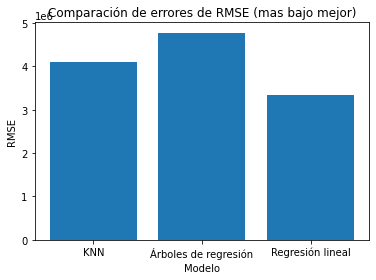

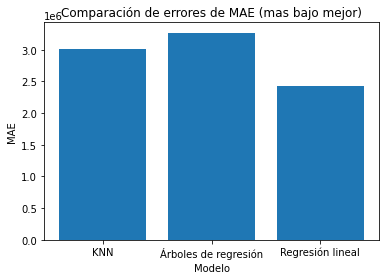

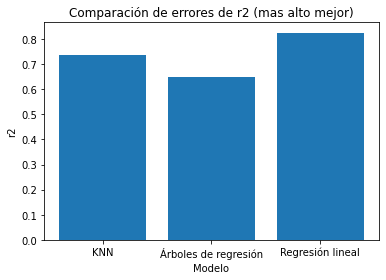

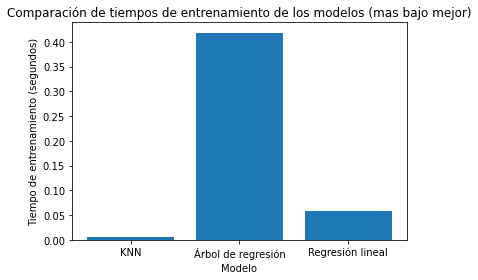

In [ ]:
# Graficar errores de RMSE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [rmse_knn, rmse_tree, rmse_lr])
plt.title('Comparación de errores de RMSE (mas bajo mejor)')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()
print("\n")

# Graficar errores de MAE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [mae_knn, mae_tree, mae_lr])
plt.title('Comparación de errores de MAE (mas bajo mejor)')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.show()
print("\n")

# Graficar error de r2
# Graficar errores de RMSE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [r2_knn, r2_tree, r2_lr])
plt.title('Comparación de errores de r2 (mas alto mejor)')
plt.xlabel('Modelo')
plt.ylabel('r2')
plt.show()
print("\n")


# Para los tiempos de entrenaimiento
# Crear una lista con los tiempos de entrenamiento de los tres modelos
train_times = [train_time_knn, train_time_tree, train_time_lr]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los tiempos de entrenamiento de los tres modelos
ax.bar(['KNN', 'Árbol de regresión', 'Regresión lineal'], train_times)

# Agregar etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo de entrenamiento (segundos)')
ax.set_title('Comparación de tiempos de entrenamiento de los modelos (mas bajo mejor)')

# Mostrar la figura
plt.show()



Como se puede observar el mejor es el de regresión lineal con los parámetros por defecto, es el que menos error tiene en ambas mediciones respecto a los otros dos. Esto puede deberse a que las variables de entrada pueden tener una relacion lineal con la de salida o porque los datos contienen ruido, lo que hace que a regresión lineal pueda producir una mejor predicción que KNN y árboles de regresión debido a su simplicidad. Los modelos más flexibles como KNN y árboles de regresión suelen ser más sensibles al ruido y producir una peor predicción. Sin embargo, no es el más rápido, ya que el KNN con los parametros por defecto es el mas rapido de los tres puede ser debido a que es un modelo no paramétrico y no requiere un proceso de entrenamiento intensivo.

## Ajuste de hiperparametros

Ajuste de hiperparametros en KNN

In [ ]:
# Crear modelo de KNN
knn = KNeighborsRegressor()

# Definir grid de parámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Realizar búsqueda de hiperparámetros
knn_grid = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Medir tiempo de entrenamiento
start_time = time.time()

knn_grid.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_knn_op = time.time() - start_time

# Obtener los mejores parámetros
knn_best_params = knn_grid.best_params_

# Entrenar modelo con los mejores parámetros
knn = KNeighborsRegressor(**knn_best_params)
knn.fit(X_train, y_train)

# Evaluar modelo con 3 mediciones
rmse_knn_op = np.sqrt(-cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_knn_op = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_knn_op = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean()


print("KNN:\n", "Best parameters:", knn_best_params, "\n", "RMSE:", rmse_knn_op, "\n", "MAE:", mae_knn_op, "\n", "r2:", r2_knn_op)
print('Tiempo de entrenamiento:', train_time_knn_op)

KNN:
 Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 
 RMSE: 3776068.0010622824 
 MAE: 2759706.5037047444 
 r2: 0.7782691357160341
Tiempo de entrenamiento: 194.26882004737854


Ajuste de hiperparametros en un arbol de regresion

In [ ]:
# Crear modelo de Árbol de Regresión
tree = DecisionTreeRegressor(random_state=12)

# Definir grid de parámetros
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Realizar búsqueda de hiperparámetros
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Medir tiempo de entrenamiento
start_time = time.time()

tree_grid.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_tree_op = time.time() - start_time

# Obtener los mejores parámetros
tree_best_params = tree_grid.best_params_

# Entrenar modelo con los mejores parámetros
tree = DecisionTreeRegressor(**tree_best_params, random_state=12)
tree.fit(X_train, y_train)

# Evaluar modelo con 3 mediciones
rmse_tree_op = np.sqrt(-cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_tree_op = -cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_tree_op = cross_val_score(tree, X_train, y_train, cv=5, scoring='r2').mean()

print("Árbol de Regresión:\n", "Best parameters:", tree_best_params, "\n", "RMSE:", rmse_tree_op, "\n", "MAE:", mae_tree_op, "\n", "r2:", r2_tree_op)
print('Tiempo de entrenamiento:', train_time_tree_op)

Árbol de Regresión:
 Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2} 
 RMSE: 3772726.516540396 
 MAE: 2714859.4913808065 
 r2: 0.7799316101304561
Tiempo de entrenamiento: 124.86138033866882


Ajuste de hiperparametros en regresion lineal

In [ ]:
# Define los hiperparámetros para ajustar
params = {'fit_intercept': [True, False],
          'copy_X': [True, False],
          'n_jobs': [-1,1]}

# Define el modelo de regresión lineal
model = LinearRegression()

# Realiza la búsqueda de cuadrícula
lr_grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
lr_grid.fit(X_train, y_train)

# Obtiene los valores óptimos de los hiperparámetros
best_params = lr_grid.best_params_

# Crea un nuevo modelo de regresión lineal utilizando los valores óptimos de los hiperparámetros
model_best = LinearRegression(**best_params)

# Medir tiempo de entrenamiento
start_time = time.time()

# Ajusta el modelo utilizando todo el conjunto de entrenamiento
model_best.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_lr_op = time.time() - start_time


# Calcula el MAE y RMSE y r2 del modelo ajustado con los valores óptimos de los hiperparámetros
# Evaluar modelo con 3 mediciones
rmse_lr_op = np.sqrt(-cross_val_score(model_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_lr_op = -cross_val_score(model_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_lr_op = cross_val_score(model_best, X_train, y_train, cv=5, scoring='r2').mean()


print("Best parameters:", best_params)
print("MAE:", mae_lr_op)
print("RMSE:", rmse_lr_op)
print("r2:", r2_lr_op)
print('Tiempo de entrenamiento:', train_time_lr_op)



Best parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}
MAE: 2399256.1578154964
RMSE: 3321414.3378868
r2: 0.8292878225493443
Tiempo de entrenamiento: 0.028561830520629883


A continuacion se muestra la misma grafica pero con los valores optimizados

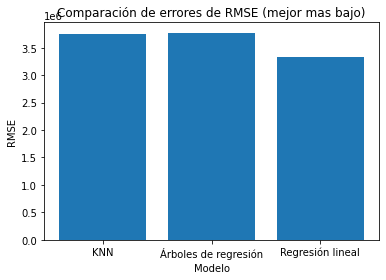

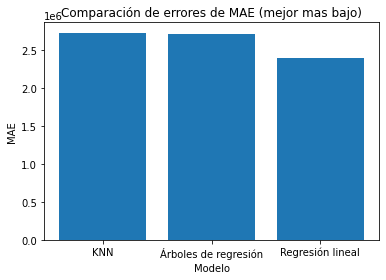

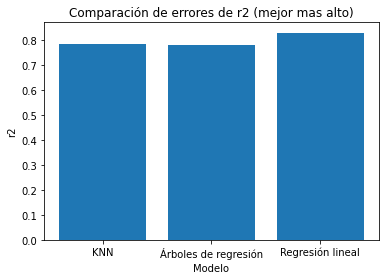

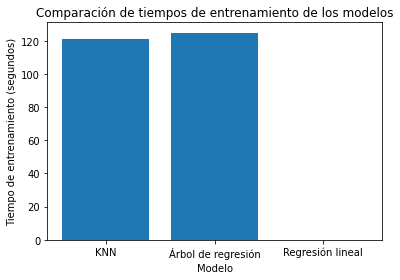

In [ ]:
# Graficar errores de RMSE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [rmse_knn_op, rmse_tree_op, rmse_lr_op])
plt.title('Comparación de errores de RMSE (mejor mas bajo)')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()
print("\n")

# Graficar errores de MAE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [mae_knn_op, mae_tree_op, mae_lr_op])
plt.title('Comparación de errores de MAE (mejor mas bajo)')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.show()
print("\n")

# Graficar errores de r2
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [r2_knn_op, r2_tree_op, r2_lr_op])
plt.title('Comparación de errores de r2 (mejor mas alto)')
plt.xlabel('Modelo')
plt.ylabel('r2')
plt.show()
print("\n")


# Para los tiempos de entrenaimiento
# Crear una lista con los tiempos de entrenamiento de los tres modelos
train_times = [train_time_knn_op, train_time_tree_op, train_time_lr_op]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los tiempos de entrenamiento de los tres modelos
ax.bar(['KNN', 'Árbol de regresión', 'Regresión lineal'], train_times)

# Agregar etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo de entrenamiento (segundos)')
ax.set_title('Comparación de tiempos de entrenamiento de los modelos')

# Mostrar la figura
plt.show()

## Comparacion respecto valores por defecto

Como se observa en las mediciones de los errores en las tres celdas, KNN y arboles de regresion han mejorado respecto a usar los valores por defecto. Esto se debe a que el modelo ha encontrado unos mejores valores de los hiperparametros, los cuales mostramos sus valores al imprimirlos. En el caso de la regresion lineal, no mejora, esto creemos que se debe a que los valores por defecto ya son los optimos de los hiperparametros y estos tambien los mostramos por pantalla.

KNN:



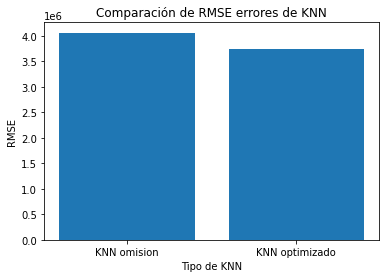

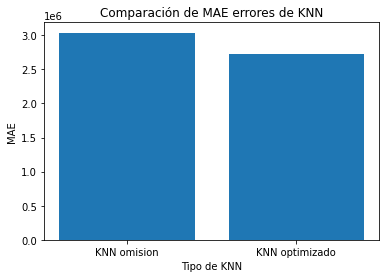



Arbol de decision:



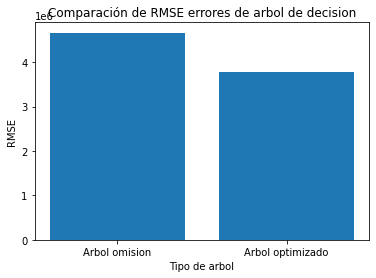

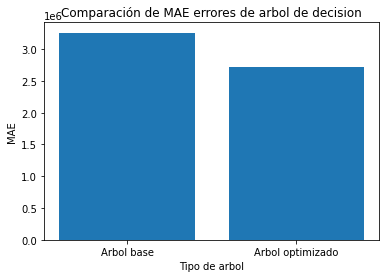



Regresion lineal:



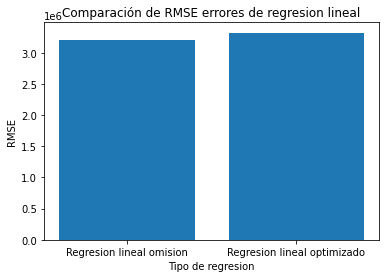

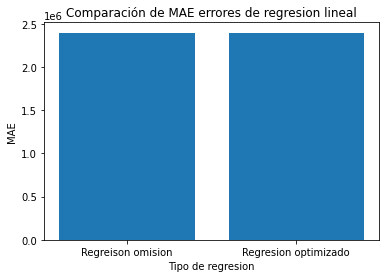

In [ ]:
# Comparacion de los errores y de los tiempos con los valores por defecto de los optimizados
print("KNN:\n")
plt.bar(['KNN omision', 'KNN optimizado'], [rmse_knn, rmse_knn_op])
plt.title('Comparación de RMSE errores de KNN')
plt.xlabel('Tipo de KNN')
plt.ylabel('RMSE')
plt.show()

plt.bar(['KNN omision', 'KNN optimizado'], [mae_knn, mae_knn_op])
plt.title('Comparación de MAE errores de KNN')
plt.xlabel('Tipo de KNN')
plt.ylabel('MAE')
plt.show()
print("\n")

print("Arbol de decision:\n")
plt.bar(['Arbol omision', 'Arbol optimizado'], [rmse_tree, rmse_tree_op])
plt.title('Comparación de RMSE errores de arbol de decision')
plt.xlabel('Tipo de arbol')
plt.ylabel('RMSE')
plt.show()

plt.bar(['Arbol base', 'Arbol optimizado'], [mae_tree, mae_tree_op])
plt.title('Comparación de MAE errores de arbol de decision')
plt.xlabel('Tipo de arbol')
plt.ylabel('MAE')
plt.show()
print("\n")

print("Regresion lineal:\n")
plt.bar(['Regresion lineal omision', 'Regresion lineal optimizado'], [rmse_lr, rmse_lr_op])
plt.title('Comparación de RMSE errores de regresion lineal')
plt.xlabel('Tipo de regresion')
plt.ylabel('RMSE')
plt.show()

plt.bar(['Regreison omision', 'Regresion optimizado'], [mae_lr, mae_lr_op])
plt.title('Comparación de MAE errores de regresion lineal')
plt.xlabel('Tipo de regresion')
plt.ylabel('MAE')
plt.show()
print("\n")

ENUNCIADO:

Obtener algunas conclusiones, tales como: ¿cuál es el mejor método? ¿Cuál de los
métodos básicos de aprendizaje automático es más rápido? ¿Los resultados son
mejores que los regresores triviales/naive/baseline? ¿El ajuste de hiperparámetros
mejora con respecto a los valores por omisión? ¿Hay algún equilibrio entre tiempo
de ejecución y mejora de resultados? Etc.

RESPUESTA:

El mejor método en cuanto a las medidas de error es el de regresion lineal, y el mas rapido es el knn. Los resultados son mejores de que los triviales/naives/baseline como se puede apreciar en las ejecuciones sin ajustes de hiperparametros. El ajuste en efecto mejora en los tres metodos respecto a los de los valores por omision. Al realizar el ajuste se tarda mas que si no se usara, esto es debido a que el programa comprueba todos los posibles "caminos" y valores que se pueden dar a los hiperparametros con todas las combinaciones dando al final el optimo.

## Reduccion dimensionalidad

ENUNCIADO:

¿Es posible reducir la dimensionalidad del problema? (aquí no tiene por qué
utilizarse una técnica estándar, sino algo que se os ocurra para que en los datos haya menos
atributos sin empeorar resultados).

RESPUESTA:



Sí, es posible reducir la dimensionalidad del problema en los datos del concurso de predicción de energía solar de AMS 2014. Hay varias técnicas que se pueden utilizar para lograr esto, aquí te menciono algunas:

---Selección de características: en lugar de utilizar todas las características en los datos, se puede seleccionar un subconjunto de características que sean relevantes para la tarea de predicción. Esto puede hacerse mediante técnicas de selección de características como la correlación, la importancia de características en modelos de aprendizaje automático, entre otras.

---Análisis de componentes principales (PCA): esta técnica de reducción de dimensionalidad se utiliza para transformar las características originales en un conjunto de características menos complejas que conservan la mayor cantidad posible de información de los datos originales.

---Técnicas de clustering: estas técnicas se utilizan para agrupar características similares y reducir la complejidad de los datos.

---Transformaciones de datos: se pueden aplicar transformaciones matemáticas a los datos para reducir la complejidad, como la transformación de Box-Cox, que se utiliza para transformar datos no normales en datos con distribución normal.

Reduccion de los datos con técnica de selección de características basada en filtro utilizando la correlación entre características y la variable objetivo:

In [ ]:
# Escalar datos
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train)
X_test_2 = scaler.transform(X_test)

# Calcular matriz de correlación
corr_matrix = np.corrcoef(X_train_2.T)

# Establecer umbral de correlación
corr_threshold = 0.2

# Eliminar características con correlación inferior al umbral
selected_features = np.where(abs(corr_matrix[-1, :-1]) > corr_threshold)[0]
X_train_reduced_f = X_train_2[:, selected_features]
X_test_reduced_f = X_test_2[:, selected_features]
print("Forma de X_train antes de reducción:", X_train.shape)
print("Forma de X_test antes de reducción:", X_test.shape)

print("Forma de X_train reducido:", X_train_reduced_f.shape)
print("Forma de X_test reducido:", X_test_reduced_f.shape)


Forma de X_train antes de reducción: (3504, 75)
Forma de X_test antes de reducción: (876, 75)
Forma de X_train reducido: (3504, 59)
Forma de X_test reducido: (876, 59)


Como se aprecia se han bajado de 75 atributos a 59.

Con PCA:

Es una técnica de reducción de dimensionalidad que se utiliza para identificar patrones en los datos y representarlos con un número menor de variables que contengan la mayor cantidad de información posible.

In [ ]:
# Escalar datos
scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train)
X_test_3 = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=10)
X_train_reduced_pca = pca.fit_transform(X_train_3)
X_test_reduced_pca = pca.transform(X_test_3)

print("Forma de X_train antes de PCA:", X_train.shape)
print("Forma de X_test antes de PCA:", X_test.shape)
print("Forma de X_train reducido por PCA:", X_train_reduced_pca.shape)
print("Forma de X_test reducido por PCA:", X_test_reduced_pca.shape)


Forma de X_train antes de PCA: (3504, 75)
Forma de X_test antes de PCA: (876, 75)
Forma de X_train reducido por PCA: (3504, 10)
Forma de X_test reducido por PCA: (876, 10)


Reduccion con regresion lineal:

In [ ]:
# Aqui con PCA

# Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad a 5 componentes principales
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Entrenar modelo de regresión lineal con los datos reducidos
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

# Predecir los valores de energía solar con el conjunto de prueba
y_pred = lr.predict(X_test_pca)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_lr_pca = mean_squared_error(y_test, y_pred, squared=False)
mae_lr_pca = mean_absolute_error(y_test, y_pred)
r2_lr_pca = r2_score(y_test, y_pred)

print('LR with PCA RMSE:', rmse_lr_pca)
print('LR with PCA MAE:', mae_lr_pca)
print('LR with PCA r2:', r2_lr_pca)



LR with PCA RMSE: 3687196.042495013
LR with PCA MAE: 2757361.902591392
LR with PCA r2: 0.7762622419677601


Reduccion con KNN:

In [ ]:
# Aqui con PCA

# Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad a 5 componentes principales
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Entrenar modelo de regresión lineal con los datos reducidos
knn = KNeighborsRegressor()
knn.fit(X_train_pca, y_train)

# Predecir los valores de energía solar con el conjunto de prueba
y_pred = knn.predict(X_test_pca)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_knn_pca = mean_squared_error(y_test, y_pred, squared=False)
mae_knn_pca = mean_absolute_error(y_test, y_pred)
r2_knn_pca = r2_score(y_test, y_pred)

print('KNN con PCA RMSE:', rmse_knn_pca)
print('KNN con PCA MAE:', mae_knn_pca)
print('KNN con PCA r2:', r2_knn_pca)

KNN con PCA RMSE: 3777451.43414771
KNN con PCA MAE: 2730757.638356164
KNN con PCA r2: 0.7651748530503795


Reduccion con arbol de decision:

In [ ]:
# Aqui con PCA

# Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad a 5 componentes principales
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Entrenar modelo de regresión lineal con los datos reducidos
tree = DecisionTreeRegressor()
tree.fit(X_train_pca, y_train)

# Predecir los valores de energía solar con el conjunto de prueba
y_pred = tree.predict(X_test_pca)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_tree_pca = mean_squared_error(y_test, y_pred, squared=False)
mae_tree_pca = mean_absolute_error(y_test, y_pred)
r2_tree_pca = r2_score(y_test, y_pred)

print('Arbol con PCA RMSE:', rmse_tree_pca)
print('Arbol con PCA MAE:', mae_tree_pca)
print('Arbol con PCA r2:', r2_tree_pca)

Arbol con PCA RMSE: 5230174.673898681
Arbol con PCA MAE: 3694235.808219178
Arbol con PCA r2: 0.5498272415919458


El número de componentes se refiere a la cantidad de variables o características que se utilizan para representar los datos originales. En el contexto de la reducción de dimensionalidad, el número de componentes se utiliza para indicar cuántas dimensiones se deben mantener después de reducir la dimensionalidad de los datos. Por ejemplo, en el método de análisis de componentes principales (PCA), el número de componentes se refiere al número de componentes principales que se utilizan para representar los datos originales.

# Metodos avanzados

Metodos SVM y RandomForest con los valores por omision

### SVM

In [ ]:
# Crear modelo SVM
svm = SVR()
np.random.seed(12)

# Evaluar modelo con 3 mediciones
# se mide el tiempo
start_time = time.time()
svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

rmse_svm = np.sqrt(-cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_svm = -cross_val_score(svm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='r2').mean()


print("SVM valores por omision:\n", "RMSE:", rmse_svm, "\n", "MAE:", mae_svm, "\n", "r2:", r2_svm, "\n", "Tiempo svm:", train_time_svm)

SVM:
 RMSE: 8038766.251087065 
 MAE: 6880516.949987573 
 r2: -0.0018165756172429325 
 Tiempo svm: 1.7804996967315674


### RandomForest

In [ ]:
# Crear modelo de Random Forest
rf = RandomForestRegressor()
np.random.seed(12)

# Entrenar modelo con mediciones y se calculan los errores

# Se mide el tiempo
start_time = time.time()
rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time


rmse_rf = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_rf = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2').mean()


print("Random Forest valores por omisión:\n", "RMSE:", rmse_rf, "\n", "MAE:", mae_rf, "\n", "r2:", r2_rf, "\n", "Tiempo rf:", train_time_rf)

Random Forest (valores por omisión):
 RMSE: 3422221.2966615716 
 MAE: 2417202.739568486 
 r2: 0.8159683583339461 
 Tiempo rf: 23.510531187057495


Como se puede ver el tiempo de entrenamiento de SVM es mucho menor que el de random forest. Esto puede deberse a la complejidad del modelo, debido a que SVM es un modelo lineal y random forest no es lineal y lo que hace es generar multiples arboles para la prediccion por lo que tarda mas.

En cuanto a los errores con los valores por defecto vemos que el random forest tiene menos error en cuanto al entrenamiento, esto puede relacionarse con la linealidad que hemos comentado ya que random forest encuentra relaciones no lineales entre los atributos y la variable objetivo, mientras que SVM solo trabaja con la separacion lineal entre las caracteristicas.

## Ajuste de hiperparametros

### SVM

In [ ]:
from sklearn import svm

# Crear modelo de SVM
svm_model = svm.SVR()

# Definir grid de parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Realizar búsqueda de hiperparámetros
svm_grid = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Medir tiempo de entrenamiento
start_time = time.time()

svm_grid.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_svm_op = time.time() - start_time

# Obtener los mejores parámetros
svm_best_params = svm_grid.best_params_

# Entrenar modelo con los mejores parámetros
svm_model = svm.SVR(**svm_best_params)
svm_model.fit(X_train, y_train)

# Evaluar modelo con 3 mediciones
rmse_svm_op = np.sqrt(-cross_val_score(svm_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_svm_op = -cross_val_score(svm_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_svm_op = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='r2').mean()

print("SVM:\n", "Best parameters:", svm_best_params, "\n", "RMSE:", rmse_svm_op, "\n", "MAE:", mae_svm_op, "\n", "r2:", r2_svm_op)
print('Tiempo de entrenamiento svm op:', train_time_svm_op)

SVM:
 Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'} 
 RMSE: 3538092.424242282 
 MAE: 2586395.9261895902 
 r2: 0.8063330242657439
Tiempo de entrenamiento: 45.36346650123596


### RandomForest

In [ ]:
# Crear modelo de Random Forest
rf = RandomForestRegressor(random_state=12)

# Definir espacio de búsqueda aleatoria
param_distributions = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Realizar búsqueda aleatoria de hiperparámetros
rf_random = RandomizedSearchCV(rf, param_distributions=param_distributions, n_iter=10, cv=5, 
                               scoring='neg_mean_squared_error', random_state=12)

# Medir tiempo de entrenamiento
start_time = time.time()

rf_random.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_rf_op = time.time() - start_time

# Obtener los mejores parámetros
rf_best_params = rf_random.best_params_

# Entrenar modelo con los mejores parámetros
rf = RandomForestRegressor(**rf_best_params, random_state=12)
rf.fit(X_train, y_train)

# Evaluar modelo con 3 mediciones
rmse_rf_op = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_rf_op = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
r2_rf_op = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2').mean()

print("Random Forest:\n", "Best parameters:", rf_best_params, "\n", "RMSE:", rmse_rf_op, "\n", 
      "MAE:", mae_rf_op, "\n", "r2:", r2_rf_op)
print('Tiempo de entrenamiento:', train_time_rf_op)



Random Forest:
 Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None} 
 RMSE: 3322844.0444433754 
 MAE: 2334369.564999792 
 r2: 0.8292426269122689
Tiempo de entrenamiento: 120.66130805015564


# Seleccion de mejor metodo y entrenamiento

Por el desempeño elegimos la regresion lineal o el randomforest con los parametros que mas rendimiento aportan.

In [ ]:
# Crear el modelo de regresión lineal
lr = LinearRegression(fit_intercept= False,
          copy_X = True,
          n_jobs= -1)

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo de regresión lineal con los datos de entrenamiento
lr.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_lr = time.time() - start_time

# Predecir los valores de producción de energía solar con el conjunto de prueba
#y_pred = lr.predict(X_test)
y_pred = lr.predict(X_test)


# Evaluar el modelo con las métricas RMSE y MAE
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print('Regresión lineal RMSE:', rmse_lr)
print('Regresión lineal MAE:', mae_lr)
print('Regresion lineal r2:', r2_lr)
print('Tiempo de entrenamiento:', train_time_lr)

Regresión lineal RMSE: 3188104.6909986394
Regresión lineal MAE: 2284217.0395576176
Regresion lineal r2: 0.8327323433785996
Tiempo de entrenamiento: 8.106212854385376


Entrenar y exportar el modelo:

In [ ]:
import pickle

# Crear el modelo de regresión lineal
lr = LinearRegression(fit_intercept= False,
          copy_X = True,
          n_jobs= -1)
# Otro modelo que podria usarse de random forest que tambien es bueno

#rf = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, max_features='sqrt', max_depth= None)

# Entrenar el modelo de regresión lineal con todos los datos de entrenamiento
lr.fit(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]))

# Guardar el modelo en un archivo llamado "modelo_final.pkl"
with open("modelo_final.pkl", "wb") as f:
    pickle.dump(lr, f)


# CONCLUSION